In [80]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from tqdm import tqdm
import imageio
import os

# evaluation
from eval_biology import load_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load results

In [81]:
dirs = [
    "db5_saliency_warmstart_seed=1",
    "db5_saliency_warmstart_seed=10",
    "db5_saliency_warmstart_seed=100",
    "db5_saliency_warmstart_seed=1000",
    "db5_saliency_warmstart_seed=10000"
]
dics, _, _ = load_results(dirs)

 25%|██▌       | 3/12 [00:00<00:00, 20.93it/s]/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are r

<Figure size 1584x144 with 0 Axes>

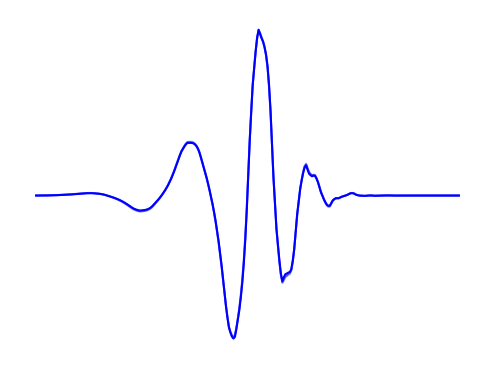

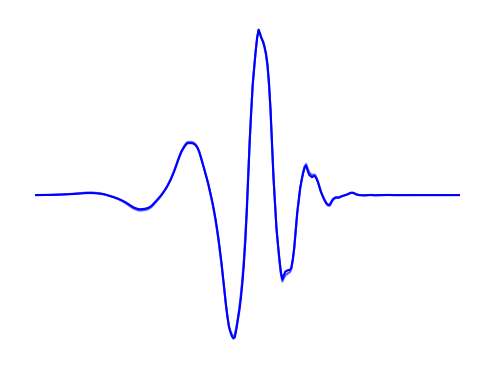

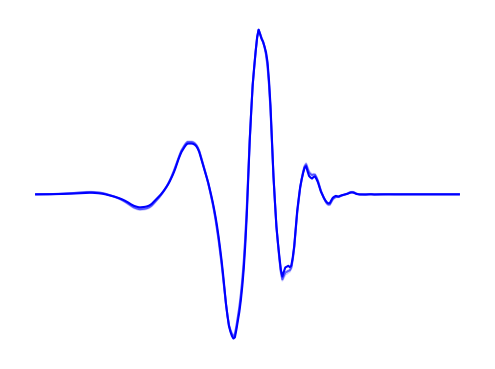

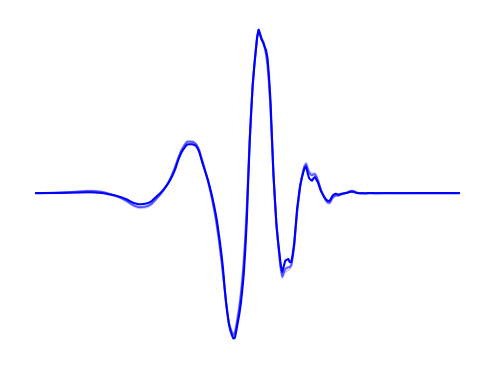

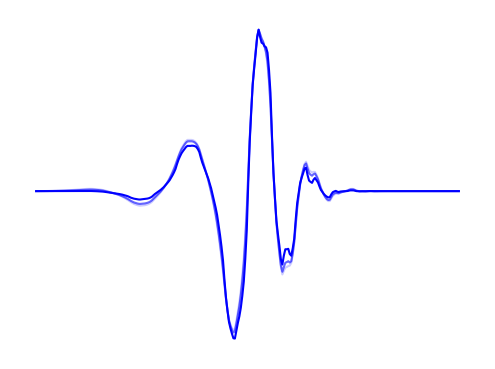

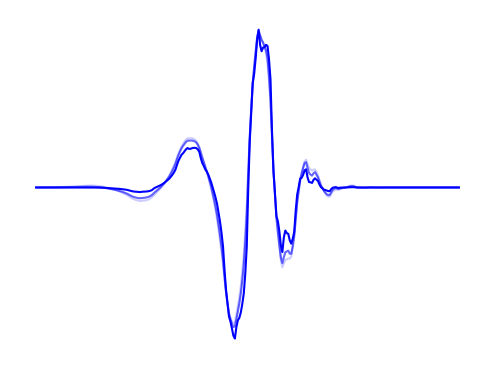

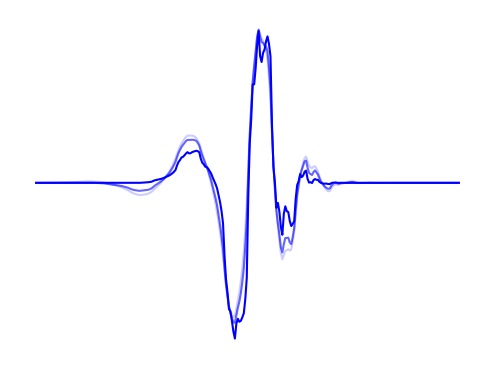

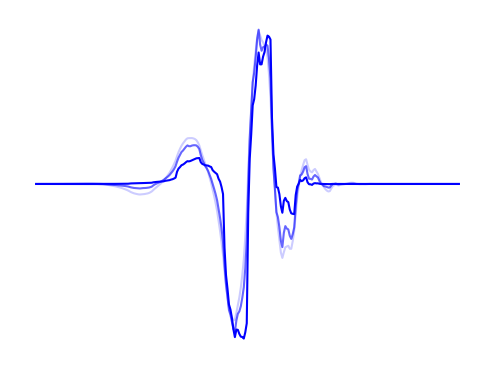

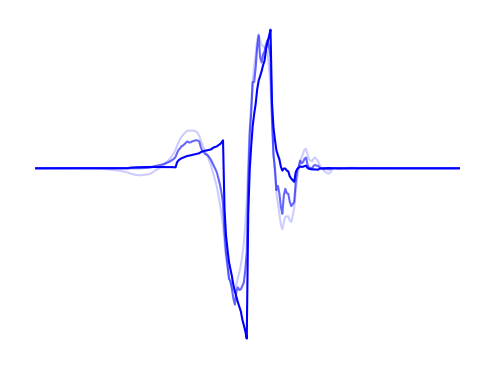

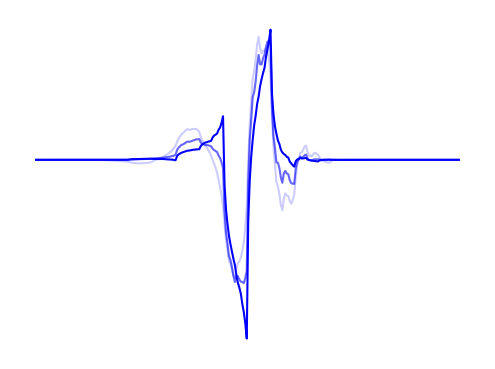

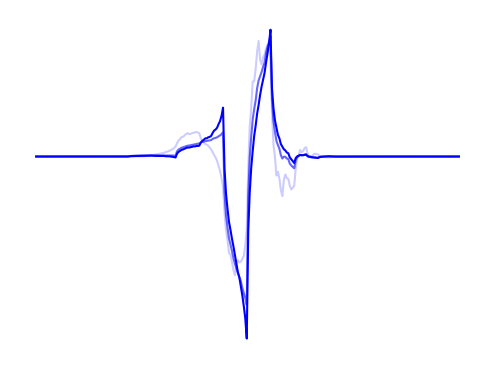

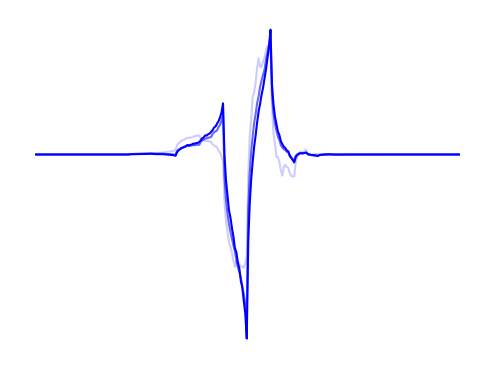

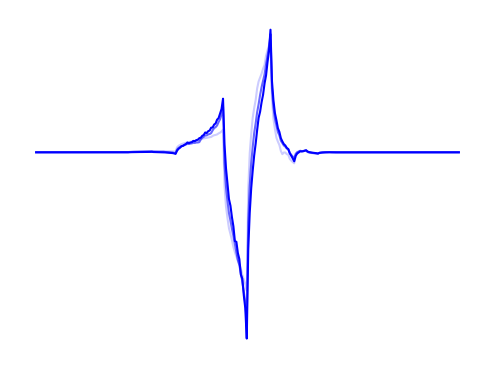

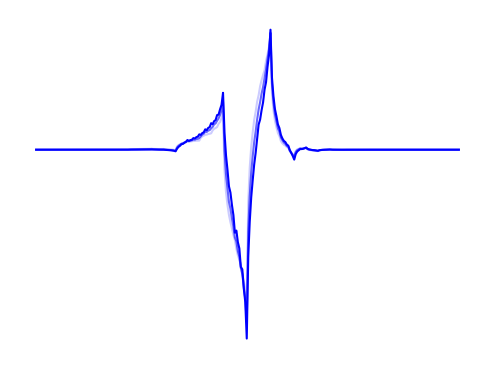

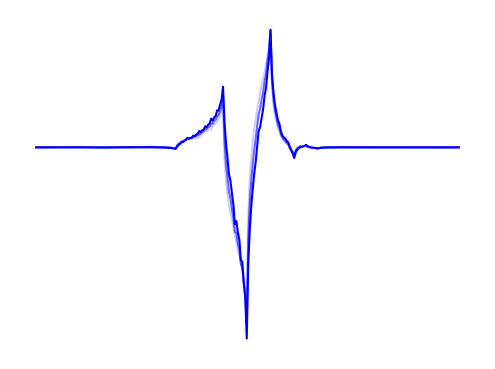

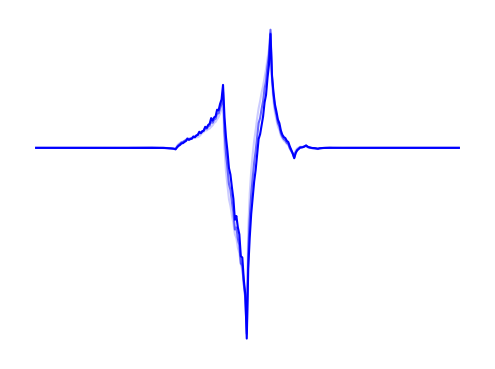

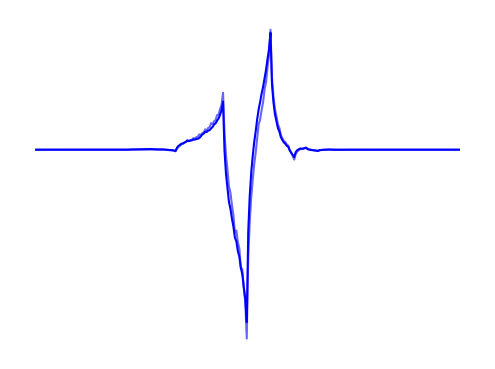

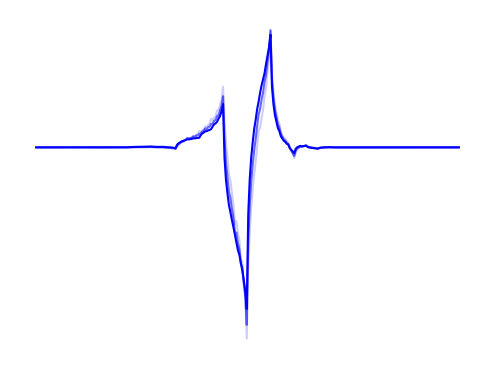

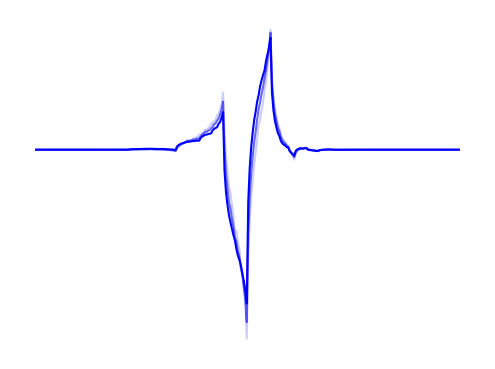

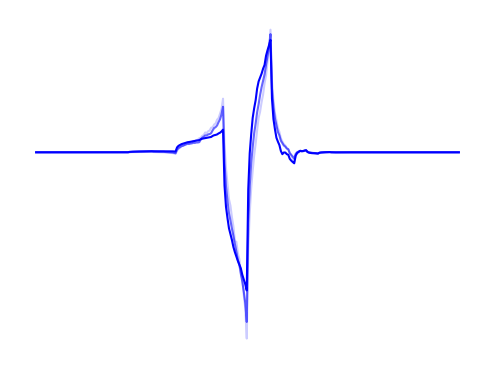

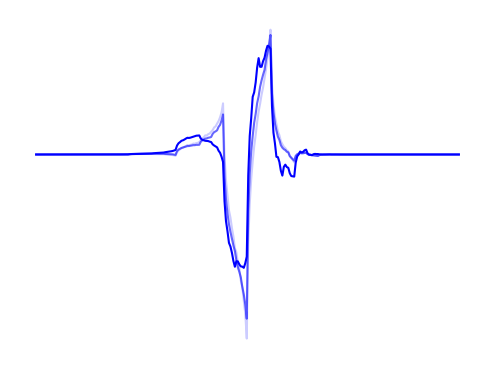

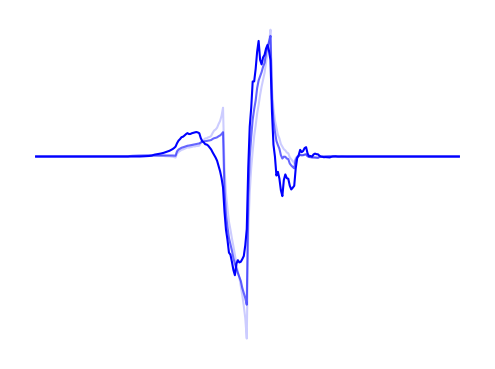

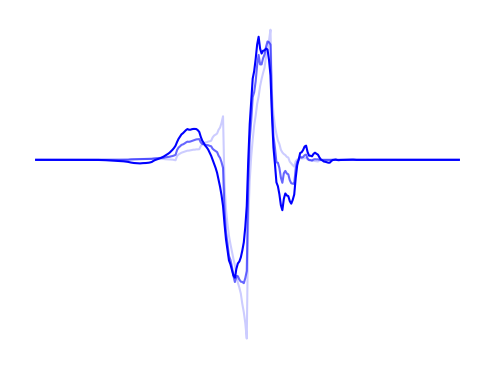

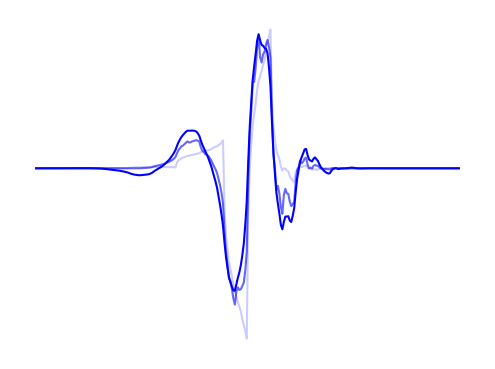

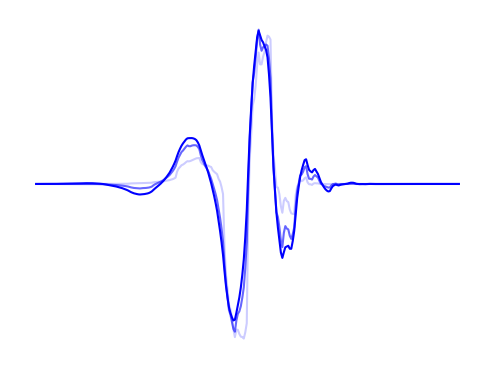

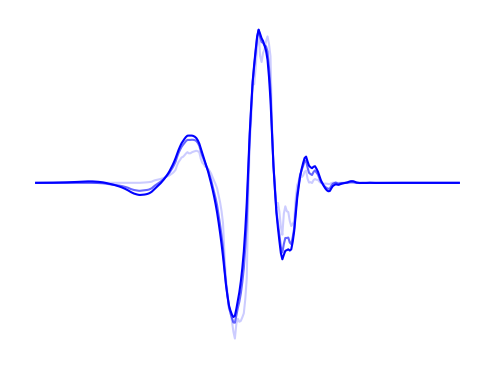

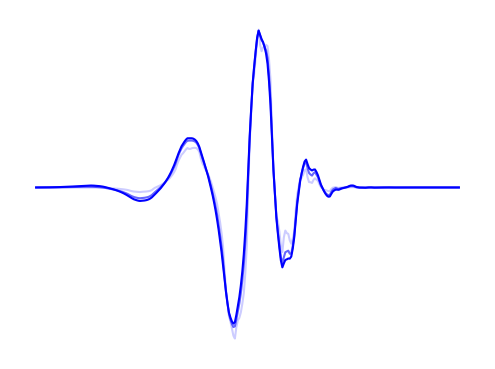

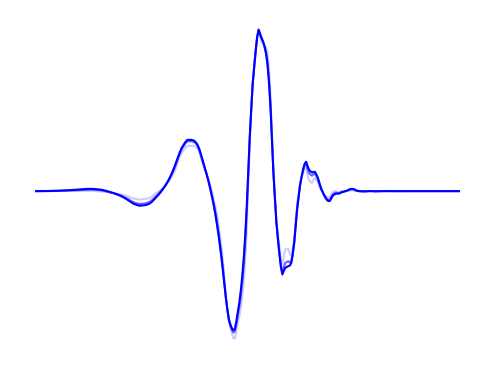

In [82]:
index = 0  # select which result to display
lamwaves = np.fromiter(dics[index]['lamL1wave'].values(), dtype=float)
lamattrs = np.fromiter(dics[index]['lamL1attr'].values(), dtype=float)
lamwaves = np.unique(lamwaves)
lamattrs = np.unique(lamattrs)
R = 1
C = len(lamattrs)

plt.figure(figsize=(C + 1, R + 1)) #, dpi=300)
gs = gridspec.GridSpec(R, C,
                       wspace=0.0, hspace=0.0,
                       top=1. - 0.5 / (R + 1), bottom=0.5 / (R + 1),
                       left=0.5 / (C + 1), right=1 - 0.5 / (C + 1))

r = 0
for c in tqdm(range(5, C)):
    fig = plt.figure(figsize=(4, 3), dpi=150)
    ax = fig.add_subplot(111)
    for i in range(0, min(c + 1, 6), 2):
        plt.plot(dics[index]['x'][(r, c - i)][1:-1],
                 dics[index]['psi'][(r, c - i)][1:-1],
                 color='blue',
                 alpha=(1 - i/5), lw=1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f'results/animate_fig/wave_{c:02d}.jpg')
    
for c in tqdm(range(C - 5, 5 - 1, -1)):
    fig = plt.figure(figsize=(4, 3), dpi=150)
    ax = fig.add_subplot(111)
    for i in range(0, min(C - 1 - c, 6), 2):
        plt.plot(dics[index]['x'][(r, c + i)][1:-1],
                 dics[index]['psi'][(r, c + i)][1:-1],
                 color='blue',
                 alpha=(1 - i/5), lw=1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f'results/animate_fig/wave_{20+(C-c):02d}.jpg')    

In [83]:
images = [imageio.imread('results/animate_fig/' + filename)
          for filename in sorted(os.listdir('results/animate_fig'))
          if filename.endswith('.jpg')]
# images = images + images[::-1]
imageio.mimsave('results/animate_fig/anim.gif', images, duration=0.15)

![](results/animate_fig/anim.gif)